In [1]:
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import model_selection, cross_validation, datasets, metrics, neighbors
%pylab inline

D:\conda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


# Задание 1
## Метод k ближайших соседей
### Генерация данных
Сгенерируем выборку, состояющую из 100 объектов, принадлежащих трем некоторым классам и обладающих двумя признаками. Данные не фиксированы и меняются при повторном запуске.

In [2]:
classification_problem = datasets.make_classification(n_samples=100, n_features =2, n_informative = 2, 
                                                      n_classes = 3, n_redundant=0, 
                                                      n_clusters_per_class=1)

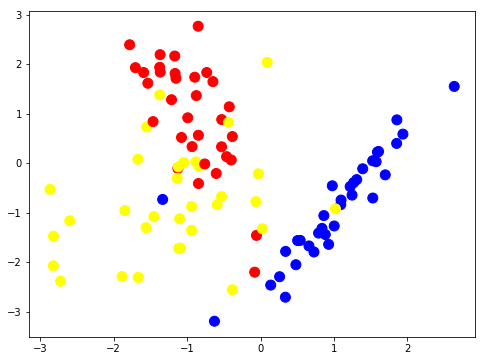

In [3]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])
pylab.figure(figsize=(8,6))
pylab.scatter(map(lambda x: x[0], classification_problem[0]), map(lambda x: x[1], classification_problem[0]), 
              c=classification_problem[1], cmap=colors, s=100)

### Разделяющие поверхности
Построим несколько поверхностей для разных k ближайших соседей. Для начала будем использовать случайное (фиксированное) разбиение выборки на 75% часть для обучения и 25% для тестов.

In [30]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 42)

In [31]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [32]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

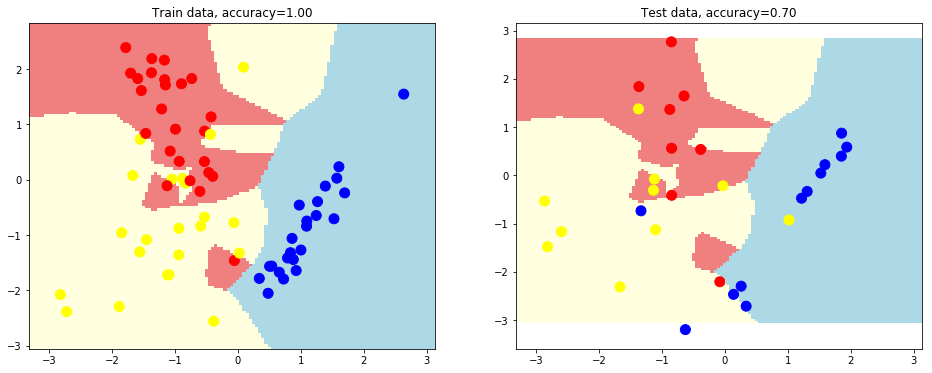

In [33]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

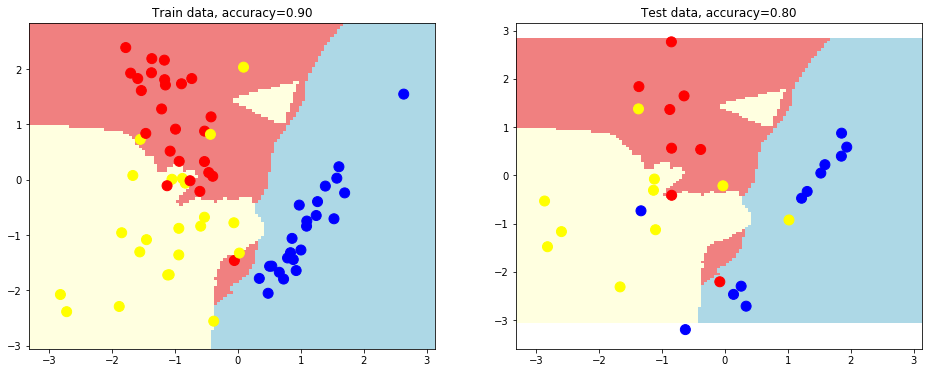

In [34]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=3)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

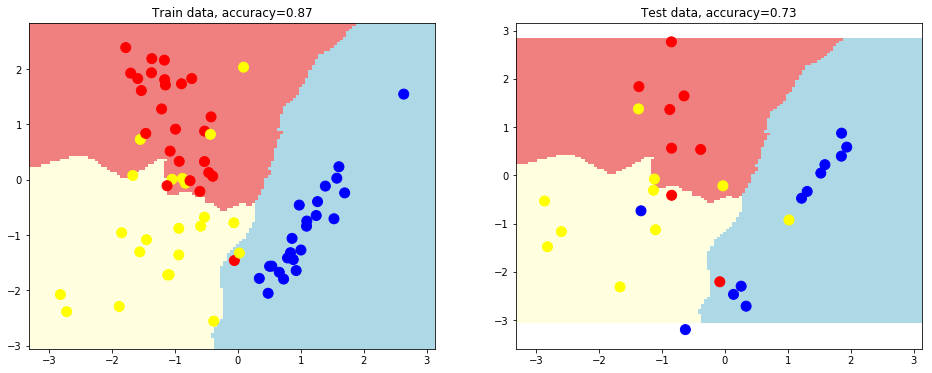

In [35]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=7)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

### Поиск оптимального k
Используем 5-fold кросс-валидацию, чтобы узнать, при каком k классификация лучше

In [14]:
scores = []
for i in range(1, 21):
    scores.append(model_selection.cross_val_score(neighbors.KNeighborsClassifier(n_neighbors=i),
                                X = classification_problem[0], y = classification_problem[1], cv=5))
means = np.mean(scores, axis=1)

Наилучший результат: 0.872756892231, достигающийся при k=3


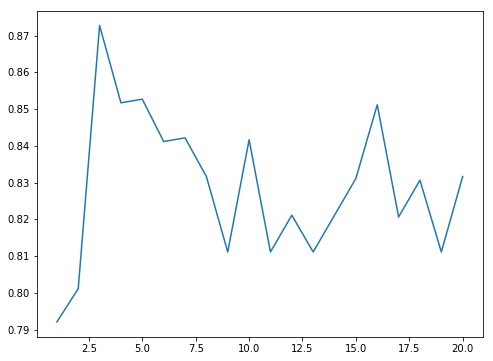

In [15]:
pylab.figure(figsize=(8, 6))
pylab.plot(range(1, 21), means)
print "Наилучший результат: " + str(np.max(means)) + ", достигающийся при k=" + str(np.argmax(means) + 1)

Следует заметить, что результат зависит от конкретной выборки, но, как правило, (при постоянном размере в 100 элементов) лежит в диапазоне от 3 до 10.